In [4]:
import xarray as xr
import cftime
pisco=xr.open_dataset("C:/Users/acer/Desktop/trabajo_final_tp2/data.nc", decode_times=False)
pisco

def fix_calendar(pisco, timevar='T'):
    if pisco[timevar].attrs['calendar']=='360':
        pisco[timevar].attrs['calendar']='360_day'
    return pisco

pisco=fix_calendar(pisco)
pisco=xr.decode_cf(pisco)
pisco

<xarray.Dataset> Size: 46MB
Dimensions:  (T: 432, Y: 198, X: 133)
Coordinates:
  * X        (X) float32 532B -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * T        (T) object 3kB 1981-01-16 00:00:00 ... 2016-12-16 00:00:00
  * Y        (Y) float32 792B 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec     (T, Y, X) float32 46MB ...

In [7]:
pisco= pisco.sel(
    X=slice(-81.20, -78.00),
    Y=slice(-3.95, -6.5) 
)

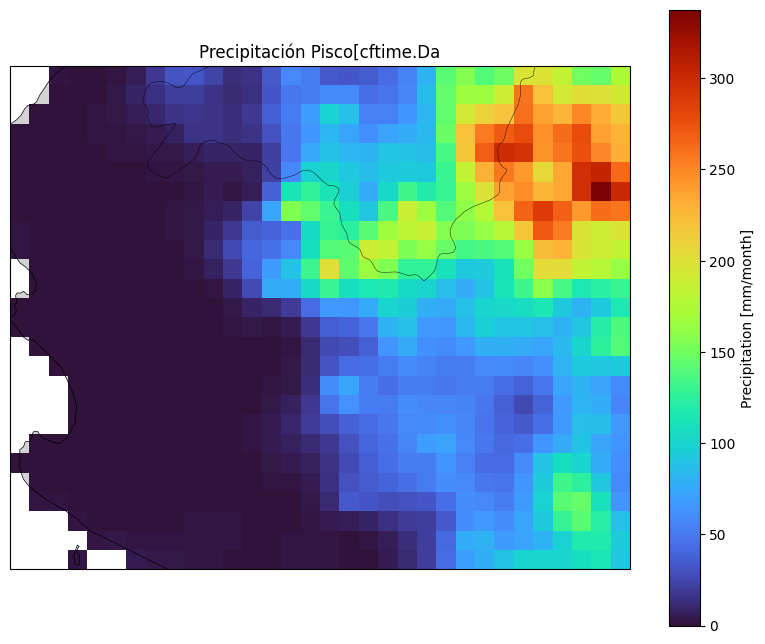

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
pisco_pp=pisco['Prec'].sel(T='2002-12-16')
fig=plt.figure(figsize=(10,8))
ax=plt.axes(projection=ccrs.PlateCarree())

pisco_pp.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='turbo',
)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.LAND,facecolor='lightgray')
ax.set_title("Precipitación Pisco"+ str(pisco_pp['T'].values)[:10])
plt.show()

In [9]:
import xarray as xr
import pandas as pd
hist=xr.open_dataset("C:/Users/acer/Desktop/trabajo_final_tp2/NoResmm_historical/pr_Amon_NorESM2-MM_historical_r1i1p1f1_gn_19810116-20141216.nc")
hist=hist.assign_coords(lon=(((hist.lon+180)%360)-180))
hist=hist.sortby(hist.lon)
hist

<xarray.Dataset> Size: 1MB
Dimensions:    (time: 408, bnds: 2, lat: 26, lon: 21)
Coordinates:
  * time       (time) object 3kB 1981-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 208B -19.32 -18.38 -17.43 ... 2.356 3.298 4.241
  * lon        (lon) float64 168B -90.0 -88.75 -87.5 ... -67.5 -66.25 -65.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 7kB ...
    lat_bnds   (time, lat, bnds) float64 170kB ...
    lon_bnds   (time, lon, bnds) float64 137kB ...
    pr         (time, lat, lon) float32 891kB ...
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1200-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     438000.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/db76e4a3-bc32-4b7c-b75b-d7654bee1266

In [10]:
import xarray as xr
import calendar
dias_por_mes = xr.DataArray(
    [calendar.monthrange(t.year, t.month)[1] for t in hist['time'].values],
    coords=[hist['time']],
    dims=['time']
)

# calculo segundos por mes
segundos_por_dia = 24 * 60 * 60
segundos_por_mes = dias_por_mes * segundos_por_dia

#precipitación de kg/m2/s a mm/mes
prec_mm_mes = hist['pr'] * segundos_por_mes

prec_mm_mes.name = 'prec_mm_mes'
hist['prec_mm_mes'] = prec_mm_mes


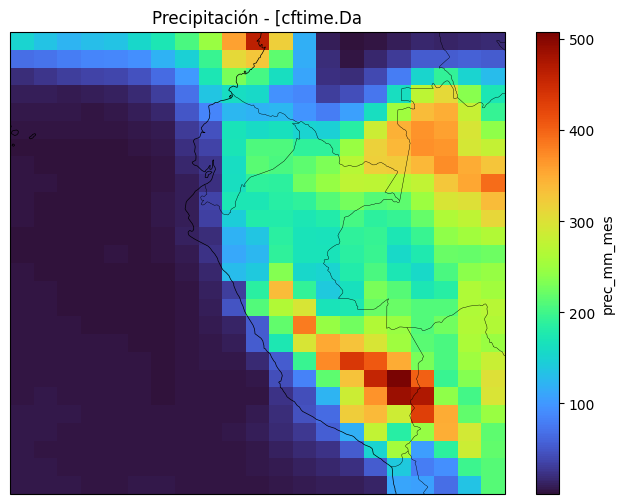

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

pp_mes = hist["prec_mm_mes"].sel(time='2002-12-16')
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())

pp_mes.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='turbo',      
)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_title("Precipitación - " + str(pp_mes['time'].values)[:10])

plt.show()

In [12]:
import numpy as np

new_lat = np.arange(-19.3, 4.2, 0.10)  
new_lon = np.arange(-85.0, -68.0, 0.10)

pr_interp = hist.interp(lat=new_lat, lon=new_lon, method="linear")
pr_interp

<xarray.Dataset> Size: 263MB
Dimensions:      (time: 408, bnds: 2, lat: 235, lon: 170)
Coordinates:
  * time         (time) object 3kB 1981-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat          (lat) float64 2kB -19.3 -19.2 -19.1 -19.0 ... 3.8 3.9 4.0 4.1
  * lon          (lon) float64 1kB -85.0 -84.9 -84.8 -84.7 ... -68.3 -68.2 -68.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) object 7kB ...
    lat_bnds     (time, lat, bnds) float64 2MB -19.77 -18.83 ... 3.629 4.571
    lon_bnds     (time, lon, bnds) float64 1MB 274.4 275.6 274.5 ... 291.3 292.5
    pr           (time, lat, lon) float64 130MB 3.618e-06 ... 1.011e-05
    prec_mm_mes  (time, lat, lon) float64 130MB 9.691 9.671 ... 25.79 27.09
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1200-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     438000.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/db76e4a3-bc32-4b7c-b75b-d7654bee1266

In [13]:
print(pr_interp.dims)
print("Latitudes:", pr_interp.lat.values.min(), pr_interp.lat.values.max())
print("Longitudes:", pr_interp.lon.values.min(), pr_interp.lon.values.max())
print("Número de puntos lat:", len(pr_interp.lat))
print("Número de puntos lon:", len(pr_interp.lon))

FrozenMappingWarningOnValuesAccess({'time': 408, 'bnds': 2, 'lat': 235, 'lon': 170})
Latitudes: -19.3 4.100000000000332
Longitudes: -85.0 -68.10000000000096
Número de puntos lat: 235
Número de puntos lon: 170


In [23]:
#rangos de Piura
lat_min, lat_max = -6.5, -3.95
lon_min, lon_max = -81.20, -78.0

mask_lat = (pr_interp.lat >= lat_min) & (pr_interp.lat <= lat_max)
mask_lon = (pr_interp.lon >= lon_min) & (pr_interp.lon <= lon_max)

# Aplicar selección
pr_piura = pr_interp.sel(
    lat=pr_interp.lat[mask_lat],
    lon=pr_interp.lon[mask_lon]
)
pr_piura


<xarray.Dataset> Size: 6MB
Dimensions:      (time: 408, bnds: 2, lat: 26, lon: 32)
Coordinates:
  * time         (time) object 3kB 1981-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat          (lat) float64 208B -6.5 -6.4 -6.3 -6.2 ... -4.3 -4.2 -4.1 -4.0
  * lon          (lon) float64 256B -81.1 -81.0 -80.9 ... -78.2 -78.1 -78.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) object 7kB ...
    lat_bnds     (time, lat, bnds) float64 170kB -6.971 -6.029 ... -4.471 -3.529
    lon_bnds     (time, lon, bnds) float64 209kB 278.3 279.5 ... 281.4 282.6
    pr           (time, lat, lon) float64 3MB 3.051e-06 4.158e-06 ... 8.12e-05
    prec_mm_mes  (time, lat, lon) float64 3MB 8.171 11.14 14.1 ... 219.9 217.5
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1200-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     438000.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/db76e4a3-bc32-4b7c-b75b-d7654bee1266

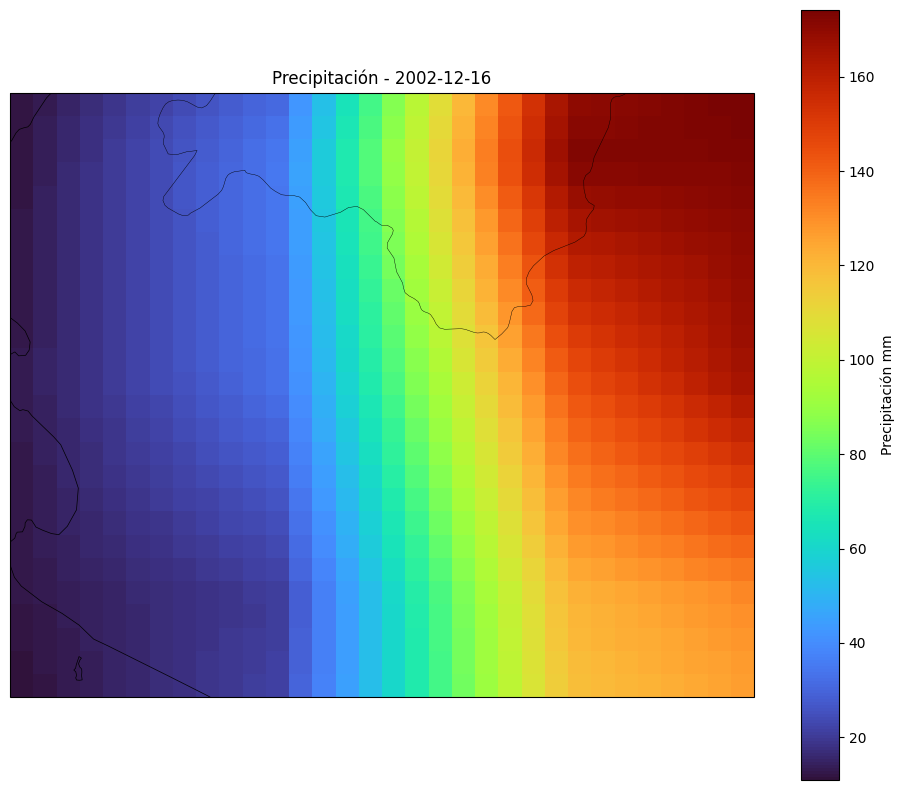

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fecha_obj = cftime.DatetimeNoLeap(2002, 12, 16, 0, 0, 0)
pp_mes = pr_piura["prec_mm_mes"].sel(time=fecha_obj, method='nearest')
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree())

pp_mes.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='turbo',        
    cbar_kwargs={'label': 'Precipitación mm'}
)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_title("Precipitación - " + str(pp_mes['time'].values)[:10])

plt.show()

In [25]:
import numpy as np
import xarray as xr

mod_hist = pr_piura['prec_mm_mes'].sel(time=slice('1981-01-01','2014-12-16'))
obs_hist = pisco['Prec'].sel(T=slice('1981-01-01','2014-12-16'))
if 'T' in obs_hist.coords:
    obs_hist = obs_hist.rename({'T':'time'})


def quantile_map_1month(mod_m, obs_m, mod_to_map):
    mod_m = mod_m[~np.isnan(mod_m)]
    obs_m = obs_m[~np.isnan(obs_m)]
    if len(mod_m)==0 or len(obs_m)==0:
        return mod_to_map  # no cambio si no hay datos
    # empírica: percentiles
    q = np.linspace(0,1,101)
    mod_q = np.quantile(mod_m, q)
    obs_q = np.quantile(obs_m, q)

    # para cada valor de mod_to_map, interpolar en la CDF empírica
    mapped = np.interp(mod_to_map, mod_q, obs_q, left=obs_q[0], right=obs_q[-1])
    return mapped

mapped_list = []
times = pr_piura.time.values
for month in range(1,13):
    # seleccionar valores de ese mes
    mod_month = mod_hist.sel(time=mod_hist['time.month']==month).values.ravel()
    obs_month = obs_hist.sel(time=obs_hist['time.month']==month).values.ravel()

    # escoger todos los tiempos del modelo para mapear
    model_month_all = pr_piura['prec_mm_mes'].sel(time=pr_piura.time.dt.month==month)
    shape = model_month_all.shape
    model_vals = model_month_all.values.ravel()

    mapped_vals = quantile_map_1month(mod_month, obs_month, model_vals)

    # reconstituir al arreglo original (time, lat, lon)
    mapped = mapped_vals.reshape(shape)
    da_mapped = xr.DataArray(mapped, coords=model_month_all.coords, dims=model_month_all.dims)
    mapped_list.append(da_mapped)

qm_corrected = xr.concat(mapped_list, dim='time').sortby('time')
qm_corrected.name = 'prec_mm_qm'
pr_piura['prec_mm_qm'] = qm_corrected

print(pr_piura)

<xarray.Dataset> Size: 9MB
Dimensions:      (time: 408, bnds: 2, lat: 26, lon: 32)
Coordinates:
  * time         (time) object 3kB 1981-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat          (lat) float64 208B -6.5 -6.4 -6.3 -6.2 ... -4.3 -4.2 -4.1 -4.0
  * lon          (lon) float64 256B -81.1 -81.0 -80.9 ... -78.2 -78.1 -78.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) object 7kB ...
    lat_bnds     (time, lat, bnds) float64 170kB -6.971 -6.029 ... -4.471 -3.529
    lon_bnds     (time, lon, bnds) float64 209kB 278.3 279.5 ... 281.4 282.6
    pr           (time, lat, lon) float64 3MB 3.051e-06 4.158e-06 ... 8.12e-05
    prec_mm_mes  (time, lat, lon) float64 3MB 8.171 11.14 14.1 ... 219.9 217.5
    prec_mm_qm   (time, lat, lon) float64 3MB 0.0 0.1081 0.3603 ... 389.9 371.9
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1200-01-01 of pi

In [26]:
new_time=[
    cftime.Datetime360Day(
        t.year, t.month, t.day if t.day <=30 else 30,
        t.hour, t.minute, t.second, has_year_zero=True
    )
    for t in pr_piura['time'].values
]

pr_piura=pr_piura.assign_coords(time=('time', new_time))
pr_piura['time'].attrs['calendar']='360_day'
pr_piura['time'].attrs['standar_name']='time'


In [28]:
#ssp585 data
pr_futuro = xr.open_dataset("C:/Users/acer/Desktop/trabajo_final_tp2/ssp8.5_NoR/pr_Amon_NorESM2-MM_ssp585_r1i1p1f1_gn_20150116-21001216.nc")
pr_futuro=pr_futuro.assign_coords(lon=(((pr_futuro.lon+180)%360)-180))
pr_futuro=pr_futuro.sortby(pr_futuro.lon)
pr_futuro.values

<bound method Mapping.values of <xarray.Dataset> Size: 3MB
Dimensions:    (time: 1032, bnds: 2, lat: 22, lon: 21)
Coordinates:
  * time       (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 176B -19.32 -18.38 -17.43 ... -1.414 -0.4712 0.4712
  * lon        (lon) float64 168B -90.0 -88.75 -87.5 ... -67.5 -66.25 -65.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 17kB ...
    lat_bnds   (time, lat, bnds) float64 363kB ...
    lon_bnds   (time, lon, bnds) float64 347kB ...
    pr         (time, lat, lon) float32 2MB ...
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             Hybrid-restart from year 2015-01-01 of historical
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     60225.0
    ...                        ...
    title:                     NorESM2-MM output prepared

In [29]:
import xarray as xr
import calendar
dias_por_mes_futuro = xr.DataArray(
    [calendar.monthrange(t.year, t.month)[1] for t in pr_futuro['time'].values],
    coords=[pr_futuro['time']],
    dims=['time']
)

# Calcular segundos por mes
segundos_por_dia = 24 * 60 * 60
segundos_por_mes = dias_por_mes_futuro * segundos_por_dia

#precipitación de kg/m2/s a mm/mes
prec_mm_mes= pr_futuro['pr'] * segundos_por_mes

prec_mm_mes.name = 'prec_mm_mes'
pr_futuro['prec_mm_mes'] = prec_mm_mes
pr_futuro

<xarray.Dataset> Size: 6MB
Dimensions:      (time: 1032, bnds: 2, lat: 22, lon: 21)
Coordinates:
  * time         (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat          (lat) float64 176B -19.32 -18.38 -17.43 ... -0.4712 0.4712
  * lon          (lon) float64 168B -90.0 -88.75 -87.5 ... -67.5 -66.25 -65.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) object 17kB ...
    lat_bnds     (time, lat, bnds) float64 363kB ...
    lon_bnds     (time, lon, bnds) float64 347kB ...
    pr           (time, lat, lon) float32 2MB ...
    prec_mm_mes  (time, lat, lon) float64 4MB 7.503 6.547 5.497 ... 290.3 253.7
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             Hybrid-restart from year 2015-01-01 of historical
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     60225.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/4bb45bf1-2c45-468e-8eed-2f19a81cf58c

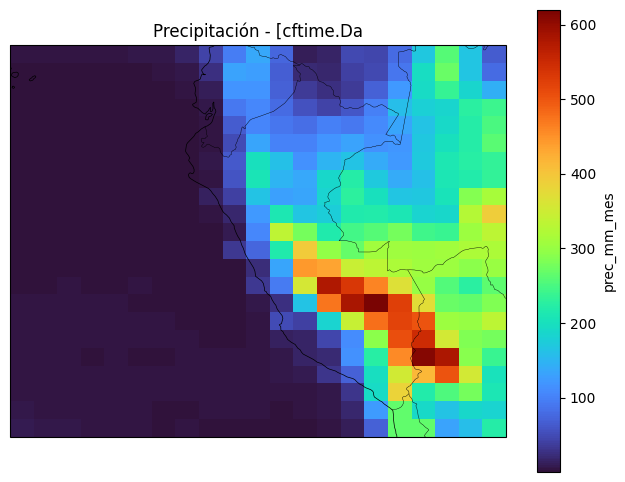

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

pp_mes = pr_futuro["prec_mm_mes"].sel(time='2050-12-16')
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())

pp_mes.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='turbo',
)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_title("Precipitación - " + str(pp_mes['time'].values)[:10])

plt.show()

In [31]:
import numpy as np

new_lat = np.arange(-19.3, 4.2, 0.10) 
new_lon = np.arange(-85.0, -68.0, 0.10)

pr_interp_futuro = pr_futuro.interp(lat=new_lat, lon=new_lon, method="linear")
pr_interp_futuro

<xarray.Dataset> Size: 666MB
Dimensions:      (time: 1032, bnds: 2, lat: 235, lon: 170)
Coordinates:
  * time         (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat          (lat) float64 2kB -19.3 -19.2 -19.1 -19.0 ... 3.8 3.9 4.0 4.1
  * lon          (lon) float64 1kB -85.0 -84.9 -84.8 -84.7 ... -68.3 -68.2 -68.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) object 17kB ...
    lat_bnds     (time, lat, bnds) float64 4MB -19.77 -18.83 -19.67 ... nan nan
    lon_bnds     (time, lon, bnds) float64 3MB 274.4 275.6 274.5 ... 291.3 292.5
    pr           (time, lat, lon) float64 330MB 1.645e-06 1.622e-06 ... nan nan
    prec_mm_mes  (time, lat, lon) float64 330MB 4.406 4.343 4.28 ... nan nan nan
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             Hybrid-restart from year 2015-01-01 of historical
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     60225.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/4bb45bf1-2c45-468e-8eed-2f19a81cf58c

In [32]:
#rangos de Piura
lat_min, lat_max = -6.5, -3.95
lon_min, lon_max = -81.20, -78.0

mask_lat = (pr_interp_futuro.lat >= lat_min) & (pr_interp_futuro.lat <= lat_max)
mask_lon = (pr_interp_futuro.lon >= lon_min) & (pr_interp_futuro.lon <= lon_max)

pr_piura_futuro= pr_interp_futuro.sel(
    lat=pr_interp_futuro.lat[mask_lat],
    lon=pr_interp_futuro.lon[mask_lon]
)
pr_piura_futuro

<xarray.Dataset> Size: 15MB
Dimensions:      (time: 1032, bnds: 2, lat: 26, lon: 32)
Coordinates:
  * time         (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat          (lat) float64 208B -6.5 -6.4 -6.3 -6.2 ... -4.3 -4.2 -4.1 -4.0
  * lon          (lon) float64 256B -81.1 -81.0 -80.9 ... -78.2 -78.1 -78.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) object 17kB ...
    lat_bnds     (time, lat, bnds) float64 429kB -6.971 -6.029 ... -4.471 -3.529
    lon_bnds     (time, lon, bnds) float64 528kB 278.3 279.5 ... 281.4 282.6
    pr           (time, lat, lon) float64 7MB 2.357e-06 3.139e-06 ... 5.656e-05
    prec_mm_mes  (time, lat, lon) float64 7MB 6.313 8.407 10.5 ... 148.9 151.5
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             Hybrid-restart from year 2015-01-01 of historical
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     60225.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/4bb45bf1-2c45-468e-8eed-2f19a81cf58c

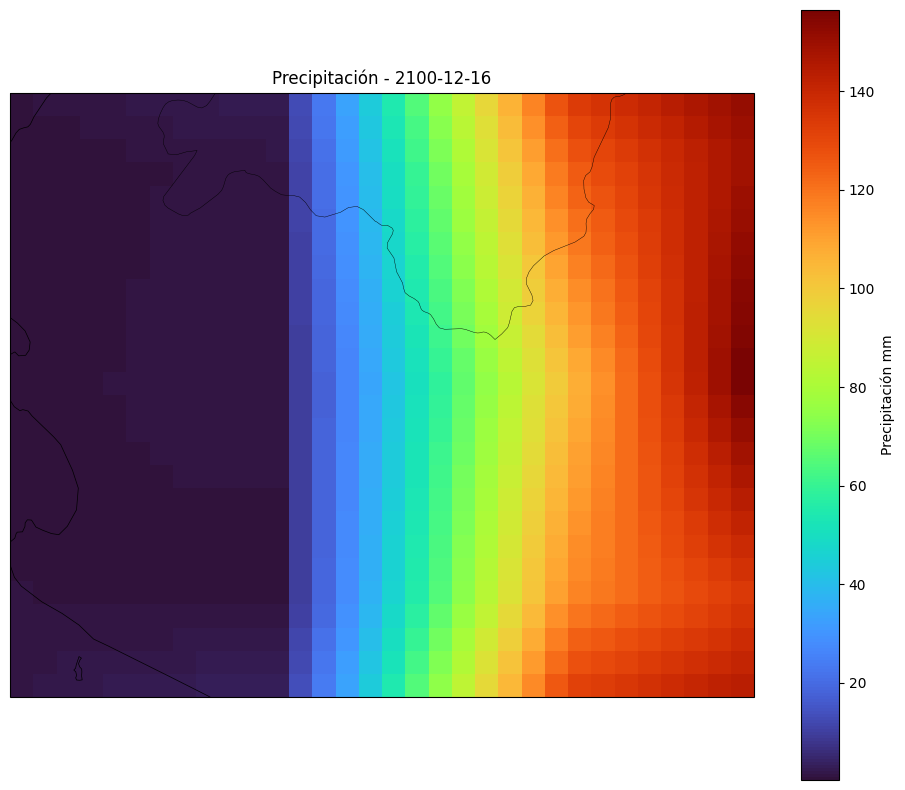

In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fecha_obj = cftime.DatetimeNoLeap(2100, 12, 16, 0, 0, 0)
pp_mes = pr_piura_futuro["prec_mm_mes"].sel(time=fecha_obj, method='nearest')

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree())

pp_mes.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='turbo',
    cbar_kwargs={'label': 'Precipitación mm'}
)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_title("Precipitación - " + str(pp_mes['time'].values)[:10])

plt.show()

In [34]:
mod_future = pr_piura_futuro['prec_mm_mes'].sel(time=slice('2015-01-16','2100-12-16'))
mapped_future_list = []

In [35]:
for month in range(1,13):
    mod_month = mod_hist.sel(time=mod_hist['time.month']==month).values.ravel()
    obs_month = obs_hist.sel(time=obs_hist['time.month']==month).values.ravel()

    fut_month = mod_future.sel(time=mod_future['time.month']==month)
    shape = fut_month.shape
    fut_vals = fut_month.values.ravel()
    mapped_vals = quantile_map_1month(mod_month, obs_month, fut_vals)
    mapped_future = mapped_vals.reshape(shape)
    da_future = xr.DataArray(mapped_future, coords=fut_month.coords, dims=fut_month.dims)
    mapped_future_list.append(da_future)

In [36]:
qm_future = xr.concat(mapped_future_list, dim='time').sortby('time')
qm_future.name = 'prec_mm_qm_future'

In [37]:
qm_future_ds = qm_future.to_dataset()   #uso el .to_dataset() porque el qm_future es un datarray y considero que es menos flexible al usarlo 
qm_future_ds

<xarray.Dataset> Size: 7MB
Dimensions:            (time: 1032, lat: 26, lon: 32)
Coordinates:
  * time               (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 1...
  * lat                (lat) float64 208B -6.5 -6.4 -6.3 -6.2 ... -4.2 -4.1 -4.0
  * lon                (lon) float64 256B -81.1 -81.0 -80.9 ... -78.1 -78.0
Data variables:
    prec_mm_qm_future  (time, lat, lon) float64 7MB 0.0 0.0009809 ... 151.4

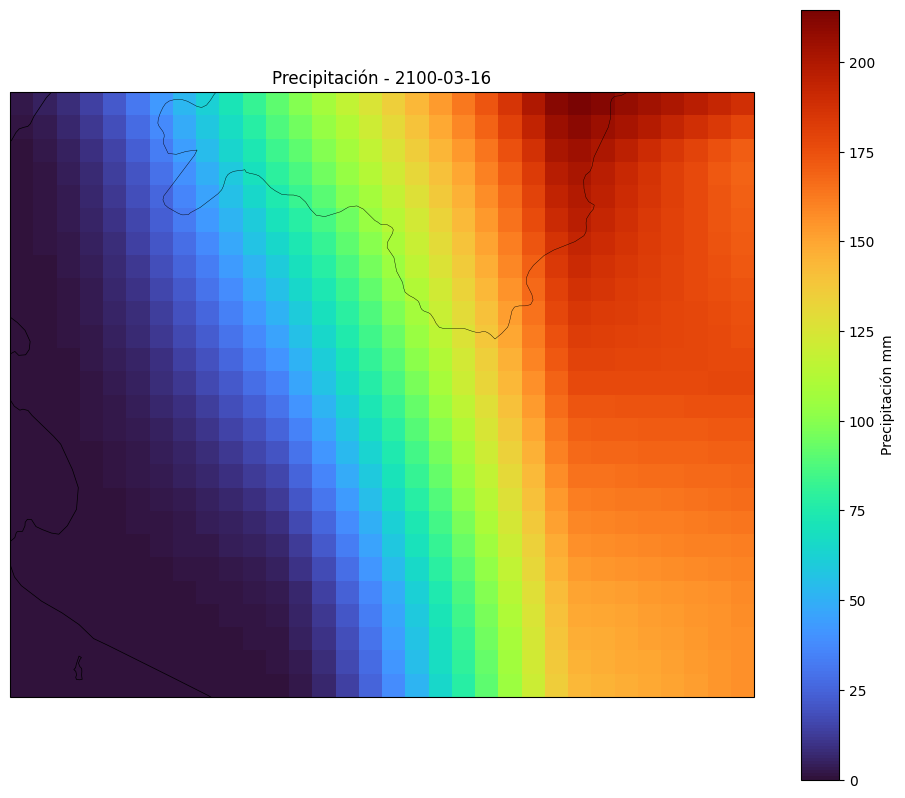

In [38]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fecha_obj = cftime.DatetimeNoLeap(2100, 3, 16, 0, 0, 0)
pp_mes = qm_future_ds['prec_mm_qm_future'].sel(time=fecha_obj, method='nearest')
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree())

pp_mes.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='turbo',  
    cbar_kwargs={'label': 'Precipitación mm'}
)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_title("Precipitación - " + str(pp_mes['time'].values)[:10])

plt.show()

In [40]:
import numpy as np
import pandas as pd
import xarray as xr
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

ds = qm_future_ds

df = ds['prec_mm_qm_future'].to_dataframe().reset_index()  # lo convierto a dataframe, columnas: time, lat, lon, prec_mm_qm_future
df = df.sort_values('time')

# FUNCION PARA CALCULAR SPI
def calcular_spi_mckee(precipitacion, ventana, umbral_cero=0.01):
    n = len(precipitacion)
    precip_acum = pd.Series(precipitacion).rolling(window=ventana, min_periods=ventana).sum()
    datos_validos = precip_acum.dropna()

    if len(datos_validos) < 30:
        return np.full(n, np.nan)

    ceros = datos_validos <= umbral_cero
    no_ceros = datos_validos[~ceros]
    q = np.sum(ceros) / len(datos_validos)

    if len(no_ceros) < 10:
        return np.full(n, np.nan)

    def estimar_gamma_mle(datos):
        def neg_log_verosimilitud(params):
            alpha, beta = params
            if alpha <= 0 or beta <= 0:
                return np.inf
            return -np.sum(stats.gamma.logpdf(datos, alpha, scale=beta))
        media = np.mean(datos)
        varianza = np.var(datos)
        if varianza == 0:
            return None, None
        alpha_ini = (media ** 2) / varianza
        beta_ini = varianza / media
        resultado = minimize(neg_log_verosimilitud, [alpha_ini, beta_ini],
                             method='L-BFGS-B', bounds=[(1e-6, 1000), (1e-6, 1000)])
        return resultado.x

    alpha, beta = estimar_gamma_mle(no_ceros.values)
    if alpha is None:
        return np.full(n, np.nan)

    prob_acum = np.full(len(datos_validos), np.nan)
    prob_acum[~ceros] = q + (1 - q) * stats.gamma.cdf(no_ceros.values, alpha, scale=beta)
    if np.any(ceros):
        prob_acum[ceros] = np.linspace(0.0001, q - 0.0001, np.sum(ceros))

    prob_acum = np.clip(prob_acum, 1e-6, 0.999999)
    spi_valores = stats.norm.ppf(prob_acum)

    spi_final = np.full(n, np.nan)
    spi_final[datos_validos.index] = spi_valores

    spi_final[datos_validos.index] = (spi_valores - np.nanmean(spi_valores)) / np.nanstd(spi_valores)

    return spi_final

ventana = [3, 6, 12, 24]

for v in ventana:
    print(f"🔹 Calculando SPI-{v} ...")
    spi_vals = []

    for (lat, lon), grupo in df.groupby(['lat', 'lon']):
        serie_spi = calcular_spi_mckee(grupo['prec_mm_qm_future'].values, ventana=v)
        tmp = pd.DataFrame({
            'time': grupo['time'].values,
            'lat': lat,
            'lon': lon,
            f'SPI_{v}': serie_spi
        })
        spi_vals.append(tmp)

    # Combinar todos los puntos
    df_spi = pd.concat(spi_vals, ignore_index=True)

    spi_ds_v = df_spi.set_index(['time', 'lat', 'lon']).to_xarray() 

    archivo_salida = f"spi_{v}_qm_future.nc"
    spi_ds_v.to_netcdf(archivo_salida)
    print(f"Guardado: {archivo_salida}")

print("Cálculo completo de SPI-3, SPI-6, SPI-12 y SPI-24.")

🔹 Calculando SPI-3 ...
Guardado: spi_3_qm_future.nc
🔹 Calculando SPI-6 ...
Guardado: spi_6_qm_future.nc
🔹 Calculando SPI-12 ...
Guardado: spi_12_qm_future.nc
🔹 Calculando SPI-24 ...
Guardado: spi_24_qm_future.nc
Cálculo completo de SPI-3, SPI-6, SPI-12 y SPI-24.


In [326]:
spi_ds=xr.open_dataset("spi_3_qm_future.nc")
spi_ds

<xarray.Dataset> Size: 7MB
Dimensions:  (time: 1032, lat: 26, lon: 32)
Coordinates:
  * time     (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat      (lat) float64 208B -6.5 -6.4 -6.3 -6.2 -6.1 ... -4.3 -4.2 -4.1 -4.0
  * lon      (lon) float64 256B -81.1 -81.0 -80.9 -80.8 ... -78.2 -78.1 -78.0
Data variables:
    SPI_3    (time, lat, lon) float64 7MB ...

In [41]:
pr_futuro1=xr.open_dataset("C:/Users/acer/Desktop/trabajo_final_tp2/ssp2.6_NoR/pr_Amon_NorESM2-MM_ssp126_r1i1p1f1_gn_20150116-21001216.nc")
pr_futuro1
pr_futuro1=pr_futuro1.assign_coords(lon=(((pr_futuro1.lon+180)%360)-180))
pr_futuro1=pr_futuro1.sortby(pr_futuro1.lon)
pr_futuro1

<xarray.Dataset> Size: 3MB
Dimensions:    (time: 1032, bnds: 2, lat: 26, lon: 21)
Coordinates:
  * time       (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 208B -19.32 -18.38 -17.43 ... 2.356 3.298 4.241
  * lon        (lon) float64 168B -90.0 -88.75 -87.5 ... -67.5 -66.25 -65.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 17kB ...
    lat_bnds   (time, lat, bnds) float64 429kB ...
    lon_bnds   (time, lon, bnds) float64 347kB ...
    pr         (time, lat, lon) float32 2MB ...
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             Hybrid-restart from year 2015-01-01 of historical
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     60225.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/f217d229-de72-42b8-bd84-452bf79d0bb4

In [42]:
import xarray as xr
import calendar
dias_por_mes_futuro1 = xr.DataArray(
    [calendar.monthrange(t.year, t.month)[1] for t in pr_futuro1['time'].values],
    coords=[pr_futuro1['time']],
    dims=['time']
)

# Calcular segundos por mes
segundos_por_dia1 = 24 * 60 * 60
segundos_por_mes1 = dias_por_mes_futuro1 * segundos_por_dia1

# precipitación de kg/m2/s a mm/mes
prec_mm_mes1= pr_futuro1['pr'] * segundos_por_mes1

prec_mm_mes1.name = 'prec_mm_mes'
pr_futuro1['prec_mm_mes'] = prec_mm_mes1
pr_futuro1

<xarray.Dataset> Size: 8MB
Dimensions:      (time: 1032, bnds: 2, lat: 26, lon: 21)
Coordinates:
  * time         (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat          (lat) float64 208B -19.32 -18.38 -17.43 ... 2.356 3.298 4.241
  * lon          (lon) float64 168B -90.0 -88.75 -87.5 ... -67.5 -66.25 -65.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) object 17kB ...
    lat_bnds     (time, lat, bnds) float64 429kB ...
    lon_bnds     (time, lon, bnds) float64 347kB ...
    pr           (time, lat, lon) float32 2MB ...
    prec_mm_mes  (time, lat, lon) float64 5MB 7.459 6.561 5.365 ... 6.01 13.11
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             Hybrid-restart from year 2015-01-01 of historical
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     60225.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/f217d229-de72-42b8-bd84-452bf79d0bb4

In [43]:
import numpy as np

new_lat = np.arange(-19.3, 4.2, 0.10)
new_lon = np.arange(-85.0, -68.0, 0.10)

pr_interp_futuro1 = pr_futuro1.interp(lat=new_lat, lon=new_lon, method="linear")
pr_interp_futuro1

<xarray.Dataset> Size: 666MB
Dimensions:      (time: 1032, bnds: 2, lat: 235, lon: 170)
Coordinates:
  * time         (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat          (lat) float64 2kB -19.3 -19.2 -19.1 -19.0 ... 3.8 3.9 4.0 4.1
  * lon          (lon) float64 1kB -85.0 -84.9 -84.8 -84.7 ... -68.3 -68.2 -68.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) object 17kB ...
    lat_bnds     (time, lat, bnds) float64 4MB -19.77 -18.83 ... 3.629 4.571
    lon_bnds     (time, lon, bnds) float64 3MB 274.4 275.6 274.5 ... 291.3 292.5
    pr           (time, lat, lon) float64 330MB 1.259e-06 1.24e-06 ... 8.564e-06
    prec_mm_mes  (time, lat, lon) float64 330MB 3.371 3.322 3.272 ... 22.8 22.94
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             Hybrid-restart from year 2015-01-01 of historical
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     60225.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/f217d229-de72-42b8-bd84-452bf79d0bb4

In [44]:
#rangos de Piura
lat_min, lat_max = -6.5, -3.95
lon_min, lon_max = -81.20, -78.0

mask_lat = (pr_interp_futuro1.lat >= lat_min) & (pr_interp_futuro1.lat <= lat_max)
mask_lon = (pr_interp_futuro1.lon >= lon_min) & (pr_interp_futuro1.lon <= lon_max)

# Aplicar selección
pr_piura_futuro1= pr_interp_futuro1.sel(
    lat=pr_interp_futuro1.lat[mask_lat],
    lon=pr_interp_futuro1.lon[mask_lon]
)
pr_piura_futuro1

<xarray.Dataset> Size: 15MB
Dimensions:      (time: 1032, bnds: 2, lat: 26, lon: 32)
Coordinates:
  * time         (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat          (lat) float64 208B -6.5 -6.4 -6.3 -6.2 ... -4.3 -4.2 -4.1 -4.0
  * lon          (lon) float64 256B -81.1 -81.0 -80.9 ... -78.2 -78.1 -78.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) object 17kB ...
    lat_bnds     (time, lat, bnds) float64 429kB -6.971 -6.029 ... -4.471 -3.529
    lon_bnds     (time, lon, bnds) float64 528kB 278.3 279.5 ... 281.4 282.6
    pr           (time, lat, lon) float64 7MB 3.318e-06 3.977e-06 ... 5.641e-05
    prec_mm_mes  (time, lat, lon) float64 7MB 8.886 10.65 12.42 ... 149.5 151.1
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             Hybrid-restart from year 2015-01-01 of historical
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     60225.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/f217d229-de72-42b8-bd84-452bf79d0bb4

In [45]:
mod_future = pr_piura_futuro1['prec_mm_mes'].sel(time=slice('2015-01-16','2100-12-16'))
mapped_future_list = []

In [46]:
for month in range(1,13):
    #Distribución histórica (modelo y observación)
    mod_month = mod_hist.sel(time=mod_hist['time.month']==month).values.ravel()
    obs_month = obs_hist.sel(time=obs_hist['time.month']==month).values.ravel()

    #Distribución futura del modelo
    fut_month = mod_future.sel(time=mod_future['time.month']==month)
    shape = fut_month.shape
    fut_vals = fut_month.values.ravel()

    #Aplicar el mapeo de cuantiles usando la función 
    mapped_vals = quantile_map_1month(mod_month, obs_month, fut_vals)
    
    mapped_future = mapped_vals.reshape(shape)
    da_future = xr.DataArray(mapped_future, coords=fut_month.coords, dims=fut_month.dims)
    mapped_future_list.append(da_future)

In [47]:
qm_future = xr.concat(mapped_future_list, dim='time').sortby('time')
qm_future.name = 'prec_mm_qm_future'
qm_future_ds = qm_future.to_dataset()   #uso el .to_dataset() porque el qm_future es un datarray y considero que es menos flexible al usarlo 
qm_future_ds

<xarray.Dataset> Size: 7MB
Dimensions:            (time: 1032, lat: 26, lon: 32)
Coordinates:
  * time               (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 1...
  * lat                (lat) float64 208B -6.5 -6.4 -6.3 -6.2 ... -4.2 -4.1 -4.0
  * lon                (lon) float64 256B -81.1 -81.0 -80.9 ... -78.1 -78.0
Data variables:
    prec_mm_qm_future  (time, lat, lon) float64 7MB 0.00429 0.07238 ... 150.6

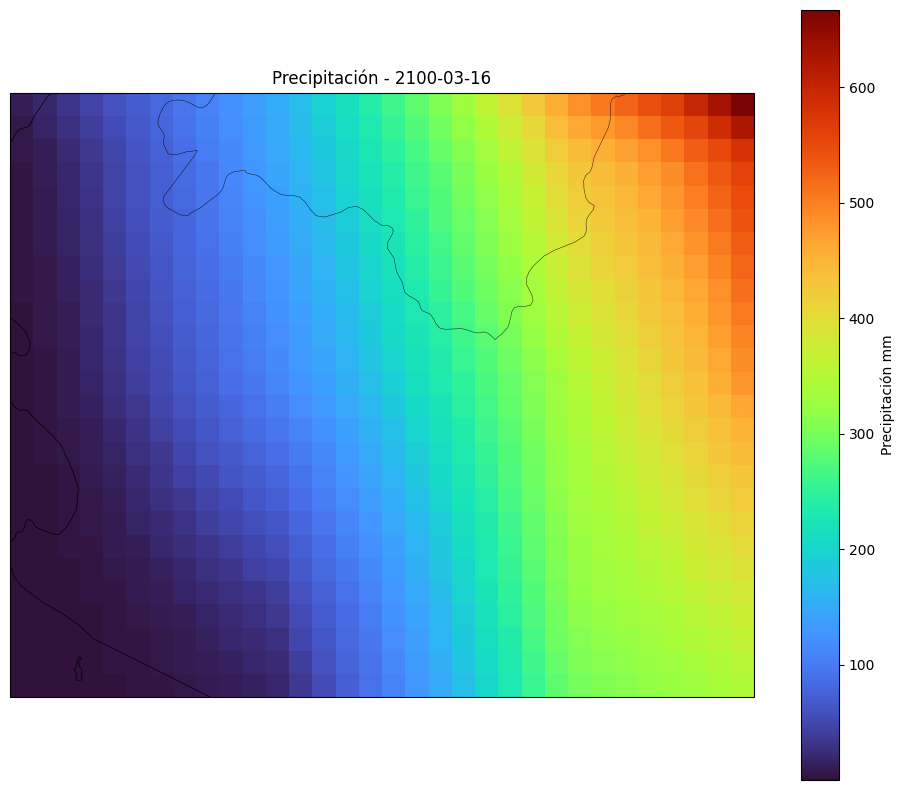

In [48]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fecha_obj = cftime.DatetimeNoLeap(2100, 3, 16, 0, 0, 0)
pp_mes = qm_future_ds['prec_mm_qm_future'].sel(time=fecha_obj, method='nearest')
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree())

pp_mes.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='turbo',        
    cbar_kwargs={'label': 'Precipitación mm'}
)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_title("Precipitación - " + str(pp_mes['time'].values)[:10])

plt.show()

In [49]:
import numpy as np
import pandas as pd
import xarray as xr
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

ds = qm_future_ds
df = ds['prec_mm_qm_future'].to_dataframe().reset_index() 
df = df.sort_values('time')

# FUNCIÓN PARA CALCULAR SPI 
def calcular_spi_mckee(precipitacion, ventana, umbral_cero=0.01):
    n = len(precipitacion)
    precip_acum = pd.Series(precipitacion).rolling(window=ventana, min_periods=ventana).sum()
    datos_validos = precip_acum.dropna()

    if len(datos_validos) < 30:
        return np.full(n, np.nan)

    ceros = datos_validos <= umbral_cero
    no_ceros = datos_validos[~ceros]
    q = np.sum(ceros) / len(datos_validos)

    if len(no_ceros) < 10:
        return np.full(n, np.nan)

    def estimar_gamma_mle(datos):
        def neg_log_verosimilitud(params):
            alpha, beta = params
            if alpha <= 0 or beta <= 0:
                return np.inf
            return -np.sum(stats.gamma.logpdf(datos, alpha, scale=beta))
        media = np.mean(datos)
        varianza = np.var(datos)
        if varianza == 0:
            return None, None
        alpha_ini = (media ** 2) / varianza
        beta_ini = varianza / media
        resultado = minimize(neg_log_verosimilitud, [alpha_ini, beta_ini],
                             method='L-BFGS-B', bounds=[(1e-6, 1000), (1e-6, 1000)])
        return resultado.x

    alpha, beta = estimar_gamma_mle(no_ceros.values)
    if alpha is None:
        return np.full(n, np.nan)

    prob_acum = np.full(len(datos_validos), np.nan)
    prob_acum[~ceros] = q + (1 - q) * stats.gamma.cdf(no_ceros.values, alpha, scale=beta)
    if np.any(ceros):
        prob_acum[ceros] = np.linspace(0.0001, q - 0.0001, np.sum(ceros))

    prob_acum = np.clip(prob_acum, 1e-6, 0.999999)
    spi_valores = stats.norm.ppf(prob_acum)

    spi_final = np.full(n, np.nan)
    spi_final[datos_validos.index] = spi_valores

    # Normalización (media 0, desviación estándar 1)
    spi_final[datos_validos.index] = (spi_valores - np.nanmean(spi_valores)) / np.nanstd(spi_valores)

    return spi_final

# Calcular SPI para varias ventanas(meses)
ventanas = [3, 6, 12, 24]

for v in ventanas:
    print(f"🔹 Calculando SPI-{v} ...")
    spi_vals = []

    # Calcular para cada punto (lat, lon)
    for (lat, lon), grupo in df.groupby(['lat', 'lon']):
        serie_spi = calcular_spi_mckee(grupo['prec_mm_qm_future'].values, ventana=v)
        tmp = pd.DataFrame({
            'time': grupo['time'].values,
            'lat': lat,
            'lon': lon,
            f'SPI_{v}': serie_spi
        })
        spi_vals.append(tmp)

    df_spi = pd.concat(spi_vals, ignore_index=True)

    spi_ds_v = df_spi.set_index(['time', 'lat', 'lon']).to_xarray()

    archivo_salida = f"spi_{v}_qm_future1.nc"
    spi_ds_v.to_netcdf(archivo_salida)
    print(f"Guardado: {archivo_salida}")

print("Cálculo completo de SPI-3, SPI-6, SPI-12 y SPI-24.")

🔹 Calculando SPI-3 ...
Guardado: spi_3_qm_future1.nc
🔹 Calculando SPI-6 ...
Guardado: spi_6_qm_future1.nc
🔹 Calculando SPI-12 ...
Guardado: spi_12_qm_future1.nc
🔹 Calculando SPI-24 ...
Guardado: spi_24_qm_future1.nc
Cálculo completo de SPI-3, SPI-6, SPI-12 y SPI-24.


In [ ]:
spi_ds=xr.open_dataset("spi_6_qm_future1.nc")
spi_ds
import cftime
import pandas as pd

# Convierte a datetime64 estándar
spi_ds['time'] = xr.decode_cf(spi_ds).time.to_index().to_datetimeindex()

C:\Users\acer\AppData\Local\Temp\ipykernel_19356\1264237542.py:7: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  spi_ds['time'] = xr.decode_cf(spi_ds).time.to_index().to_datetimeindex()
C:\Users\acer\AppData\Local\Temp\ipykernel_19356\1264237542.py:7: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  spi_ds['time'] = xr.decode_cf(spi_ds).time.to_index().to_datetimeindex()


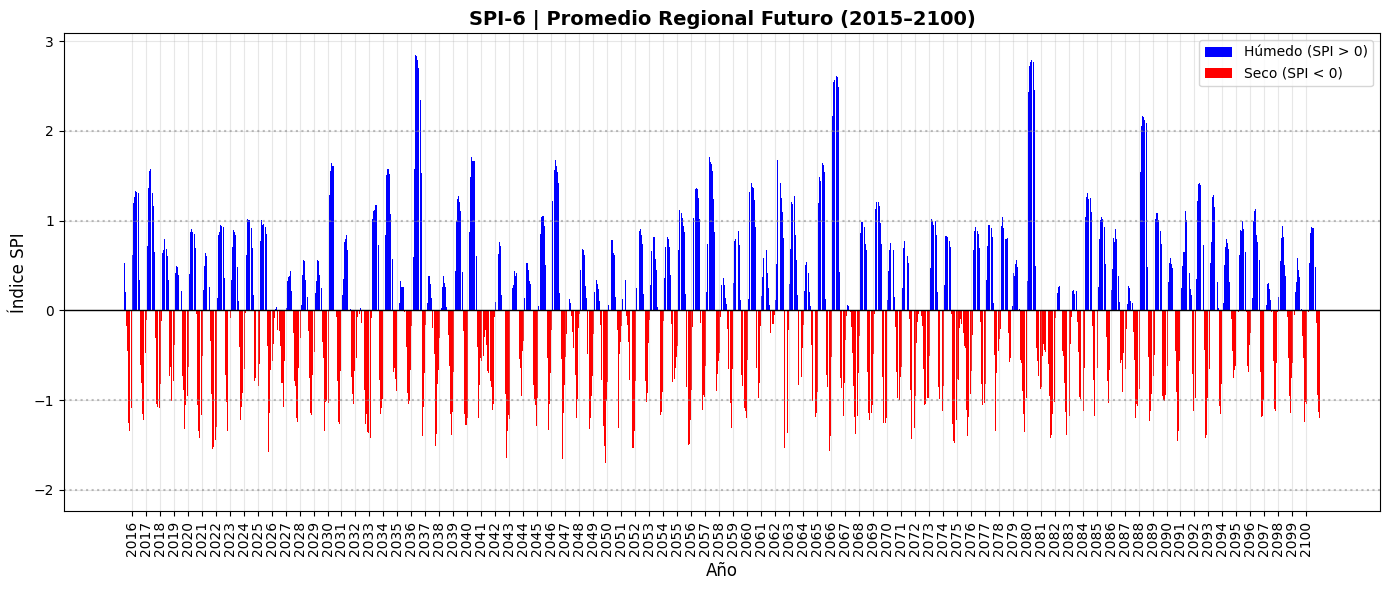

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

df_spi = spi_ds['SPI_6'].mean(dim=['lat','lon']).to_dataframe().reset_index()

plt.figure(figsize=(14, 6))

spi = df_spi['SPI_6']
fechas = pd.to_datetime(df_spi['time'])

colores = ['blue' if val > 0 else 'red' for val in spi]
plt.bar(fechas, spi, color=colores, width=25)
plt.axhline(0, color='black', linewidth=1)
plt.axhline(1, color='gray', linestyle=':', alpha=0.5)
plt.axhline(-1, color='gray', linestyle=':', alpha=0.5)
plt.axhline(2, color='gray', linestyle=':', alpha=0.5)
plt.axhline(-2, color='gray', linestyle=':', alpha=0.5)
plt.title("SPI-6 | Promedio Regional Futuro (2015–2100)", fontsize=14, weight='bold')
plt.ylabel("Índice SPI", fontsize=12)
plt.xlabel("Año", fontsize=12)

años = pd.date_range(fechas.min(), fechas.max(), freq='YS')
plt.xticks(años, [str(a.year) for a in años], rotation=90)
legend_elements = [
    Patch(facecolor='blue', label='Húmedo (SPI > 0)'),
    Patch(facecolor='red', label='Seco (SPI < 0)')
]
plt.legend(handles=legend_elements, loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("spi6_futuro_barras1.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import xarray as xr
import numpy as np
from scipy.stats import ttest_ind, ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns

file_ssp1_26 = 'spi_24_qm_future1.nc'
file_ssp5_85 = 'spi_24_qm_future.nc'
spi_var_name = 'SPI_24'

In [371]:
s=xr.open_dataset('spi_6_qm_future1.nc')
s

<xarray.Dataset> Size: 7MB
Dimensions:  (time: 1032, lat: 26, lon: 32)
Coordinates:
  * time     (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat      (lat) float64 208B -6.5 -6.4 -6.3 -6.2 -6.1 ... -4.3 -4.2 -4.1 -4.0
  * lon      (lon) float64 256B -81.1 -81.0 -80.9 -80.8 ... -78.2 -78.1 -78.0
Data variables:
    SPI_6    (time, lat, lon) float64 7MB ...

In [ ]:
def load_and_extract_spi(file_path, var_name):
    """Carga el archivo NetCDF, asume que es un promedio regional o calcula el promedio espacial."""
    try:
        ds = xr.open_dataset(file_path)
        spi_data = ds[var_name]
        if 'lat' not in spi_data.dims and 'lon' not in spi_data.dims:
            return spi_data.values
        
        elif 'lat' in spi_data.dims and 'lon' in spi_data.dims:
            print(f"Calculando promedio espacial para {file_path}...")
            spi_regional_mean = spi_data.mean(dim=['lat', 'lon'], skipna=True)
            return spi_regional_mean.values
        
        else:
            return spi_data.values.flatten()

    except FileNotFoundError:
        print(f"ERROR: Archivo no encontrado en {file_path}. Usando datos simulados en su lugar.")
        num_meses = 1032
        return np.random.normal(loc=0.0, scale=1.0, size=num_meses)


spi_ssp1_26 = load_and_extract_spi(file_ssp1_26, spi_var_name)
spi_ssp5_85 = load_and_extract_spi(file_ssp5_85, spi_var_name)

min_len = min(len(spi_ssp1_26), len(spi_ssp5_85))
spi_ssp1_26 = spi_ssp1_26[:min_len]
spi_ssp5_85 = spi_ssp5_85[:min_len]

Calculando promedio espacial para spi_24_qm_future1.nc...
Calculando promedio espacial para spi_24_qm_future.nc...


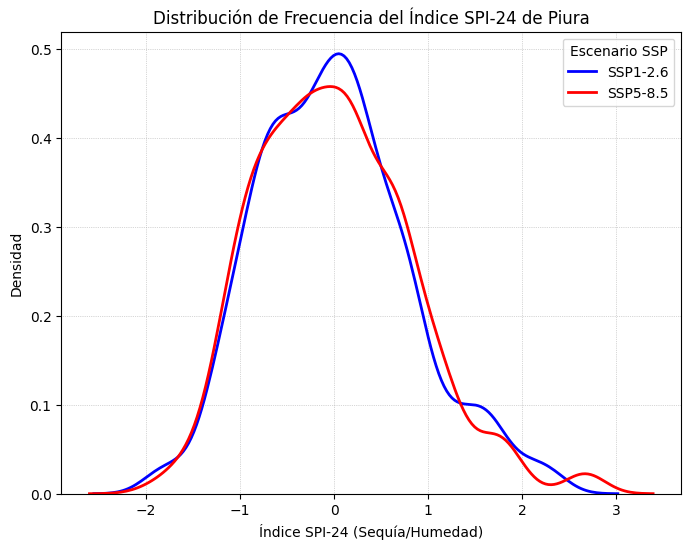

In [ ]:
# Código para generar el gráfico de distribución
plt.figure(figsize=(8, 6))
sns.kdeplot(spi_ssp1_26, label='SSP1-2.6', color='blue', linewidth=2)
sns.kdeplot(spi_ssp5_85, label='SSP5-8.5', color='red', linewidth=2)
plt.title('Distribución de Frecuencia del Índice SPI-24 de Piura')
plt.xlabel('Índice SPI-24 (Sequía/Humedad)')
plt.ylabel('Densidad')
plt.legend(title='Escenario SSP')
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.savefig("DISTRIBUCIÓN_SPI24.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:

bias1= pr_piura_aligned['prec_mm_mes'] - pisco_aligned['Prec']
print(bias1)
bias_ds1=bias1.to_dataset(name='bias1')
bias_ds1
promedio_total = bias_ds1['bias1'].mean(dim='time')

FrozenMappingWarningOnValuesAccess({'lat': 26, 'lon': 32, 'time': 136, 'bnds': 2})
FrozenMappingWarningOnValuesAccess({'lat': 26, 'lon': 32, 'time': 136})
<xarray.DataArray (time: 136, lat: 26, lon: 32)> Size: 905kB
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
          9.62975547e+01,  1.00039203e+02,             nan],
        [            nan,             nan,             nan, ...,
          8.59253997e+01,  8.96377261e+01,             nan],
        ...,
        [            nan,  4.91369828e+01,  5.81072283e+01, ...,
          1.37436951e+02,  1.00990337e+02,             nan],
        [            nan,             nan,  5.87023903e+01, ...,
          1.62834844e+02,  1.23258793e+02,             nan],
        [            nan,             nan,  5.81365444e+01, ...,
          1.63856884e+02,  1.44790868e+02,             nan]],

       [[    

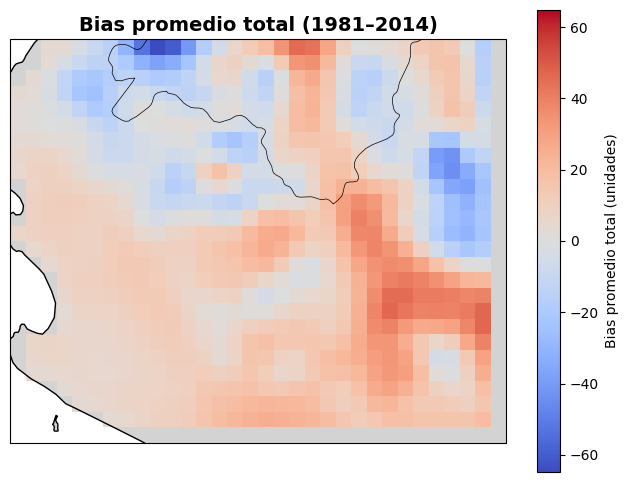

In [435]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

im = promedio_total.plot(ax=ax, transform=ccrs.PlateCarree(),
                         cmap='coolwarm', cbar_kwargs={'label': 'Bias promedio total (unidades)'})

ax.coastlines(linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Bias promedio total (1981–2014)', fontsize=14, weight='bold')

plt.show()

In [427]:
import geopandas as gpd
import rioxarray
piura_shp = gpd.read_file("C:/Users/acer/Desktop/trabajo_final_tp2/piura.shp")

In [ ]:
piura_shp = piura_shp[piura_shp['NOMBDEP'] == 'PIURA']
promedio_total = promedio_total.rio.write_crs("EPSG:4326", inplace=True)
promedio_total = promedio_total.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
promedio_piura = promedio_total.rio.clip(piura_shp.geometry, piura_shp.crs, drop=True)

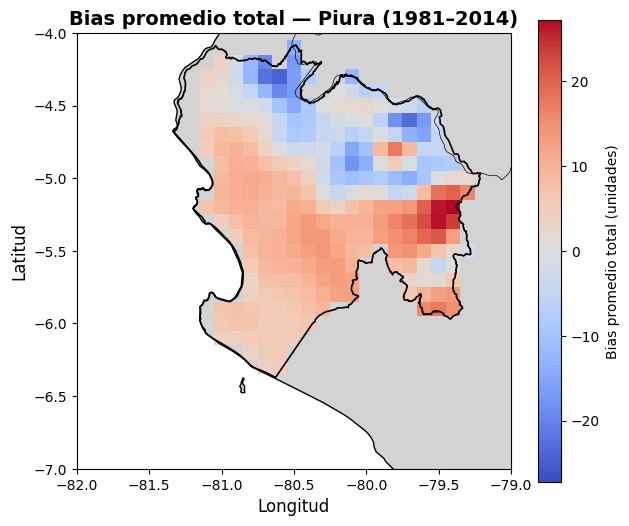

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

fig = plt.figure(figsize=(7,6))
ax = plt.axes(projection=ccrs.PlateCarree())

im = promedio_piura.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    cbar_kwargs={'label': 'Bias promedio total (unidades)'}
)

piura_shp.boundary.plot(ax=ax, edgecolor='black', linewidth=1.2)
ax.coastlines(linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
lon_min = float(promedio_piura.lon.min())
lon_max = float(promedio_piura.lon.max())
lat_min = float(promedio_piura.lat.min())
lat_max = float(promedio_piura.lat.max())
lon_ticks = np.arange(np.floor(lon_min), np.ceil(lon_max)+0.1, 0.5)
lat_ticks = np.arange(np.floor(lat_min), np.ceil(lat_max)+0.1, 0.5)

ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())
ax.tick_params(labelsize=10)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)
ax.set_title("Bias promedio total — Piura (1981–2014)", fontsize=14, weight="bold")
plt.show()